In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import pickle, datetime
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import LSTM, Input, TimeDistributed,Convolution2D,Activation
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing import sequence
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as trans
import itertools
# Import the backend
from keras import backend as Ktensorflow_backend_get_available_gpus
import os

In [41]:
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator#, array_to_img, img_to_array, load_img

In [42]:
from keras_preprocessing.image import img_to_array

In [43]:
from tensorflow.keras.utils import load_img

In [44]:
from tensorflow.keras.utils import array_to_img

In [45]:
print(os.listdir("data/"))

['Test', 'Train']


In [46]:
SIZE = 128

In [47]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [48]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [49]:
tf.config.list_physical_devices('GPU')

[]

In [50]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [51]:
gpus_local = tf.config.experimental.list_logical_devices('GPU')

In [52]:
len(gpus)

1

In [53]:
len(gpus_local)

0

In [54]:
print(os.listdir("data"))

['Test', 'Train']


In [55]:
data_dir = 'data'

In [56]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [58]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
             #os.remove("data")

Issue with image data\Test\-AB-Agri-partner-to-allow-scalable-production-of-algae-from-carbon-emissions.jpg
Issue with image data\Test\02_News_banner_1300x570_2-1d9d0f86.jpeg
Issue with image data\Test\0718-560X-lajar-48-02-0329-gf01.jpg
Issue with image data\Test\1-s2.0-S0168165620302066-gr2.jpg
Issue with image data\Test\1-s2.0-S0269749119376985-gr2.jpg
Issue with image data\Test\1-s2.0-S0960852419300860-ga1.jpg
Issue with image data\Test\1-s2.0-S102691851830009X-gr1.jpg
Issue with image data\Test\1-s2.0-S1319562X12000332-gr5.jpg
Issue with image data\Test\1-s2.0-S1756464620301432-gr1.jpg
Issue with image data\Test\1-s2.0-S2211926417303454-gr9.jpg
Issue with image data\Test\1-s2.0-S2211926417308330-gr2.jpg
Issue with image data\Test\10811_2010_9591_Fig2_HTML.jpg
Issue with image data\Test\10811_2019_1763_Fig2_HTML.jpg
Issue with image data\Test\11-Figure2-1.png
Issue with image data\Test\11270_2020_4652_Fig2_HTML.png
Issue with image data\Test\11274_2010_632_Fig1_HTML.jpg
Issue with 

Issue with image data\Test\jmse-09-01275-g001.png
Issue with image data\Test\jmse-09-01275-g009.png
Issue with image data\Test\jxdAcF2Q_400x400.png
Issue with image data\Test\list-img.png
Issue with image data\Test\List-of-species-of-microalgae-tested.png
Issue with image data\Test\liz_harrell_yvn5UBRamAM_unsplash.6144d27839870.png
Issue with image data\Test\Lotus-HR-project-3b-Algea-1a.jpg
Issue with image data\Test\Lotus-HR-project-3b-Algea-inset-1a.jpg
Issue with image data\Test\maxresdefault.jpg
Issue with image data\Test\micro-algae_for_mitigating_carbon_dioxide.jpeg
Issue with image data\Test\microalgae-sustainability.jpg
Issue with image data\Test\microalgae.jpg
Issue with image data\Test\microalgae_figure_1.jpg
Issue with image data\Test\Micrograph-of-S-razoulzadegani-fed-Tetraselmis-chui-PLY-429-showing-variety-of.png
Issue with image data\Test\Micrograph-of-S-razoulzadegani-fed-Tetraselmis-chui-PLY-429-showing-variety-of_Q320.jpg
Issue with image data\Test\Microscopic-images-

Issue with image data\Train\liz_harrell_yvn5UBRamAM_unsplash.6144d27839870.png
Issue with image data\Train\maxresdefault - Copy.jpg
Issue with image data\Train\maxresdefault.jpg
Issue with image data\Train\mqdefault - Copy.jpg
Issue with image data\Train\mqdefault.jpg
Issue with image data\Train\Photomicrographs-of-a-Euglena-gracilis-b-E-viridis-c-E-polymorpha-d - Copy.png
Issue with image data\Train\Photomicrographs-of-a-Euglena-gracilis-b-E-viridis-c-E-polymorpha-d.png
Issue with image data\Train\Plates-showing-algal-diversity-A-a-green-micro-algae-Nannochloropsis-sp_Q320 - Copy.jpg
Issue with image data\Train\Plates-showing-algal-diversity-A-a-green-micro-algae-Nannochloropsis-sp_Q320.jpg
Issue with image data\Train\polluted-water-and-scum-on-green-water-surface-environmental-pollution-aerial-top-view-2FN0PDD - Copy.jpg
Issue with image data\Train\polluted-water-and-scum-on-green-water-surface-environmental-pollution-aerial-top-view-2FN0PDD.jpg
Issue with image data\Train\polluted-w

In [59]:
data_iterator = data.as_numpy_iterator()

In [60]:
batch = data_iterator.next()

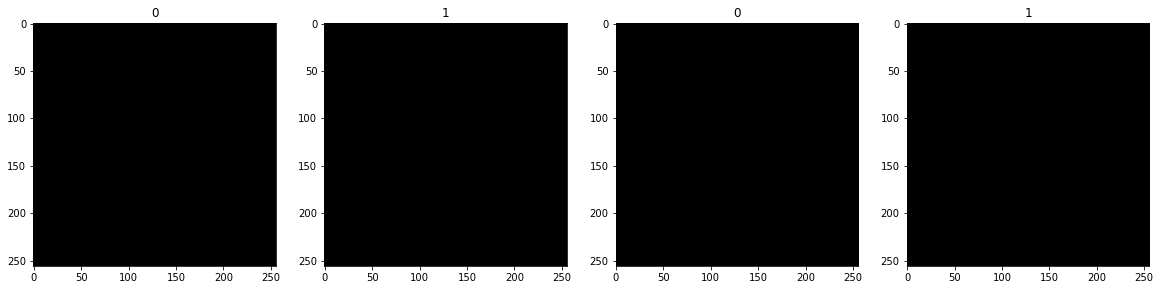

In [62]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [63]:
data = data.map(lambda x,y: (x/255, y))

In [64]:
data.as_numpy_iterator().next()

(array([[[[1.9014839e-03, 1.9629989e-03, 1.9810805e-03],
          [1.8228566e-03, 1.8681517e-03, 1.9426723e-03],
          [1.8832784e-03, 1.8697621e-03, 2.0505819e-03],
          ...,
          [1.8827678e-03, 1.8673891e-03, 1.9570114e-03],
          [1.9105632e-03, 1.8838608e-03, 2.0346842e-03],
          [1.9119884e-03, 1.8812310e-03, 2.0784508e-03]],
 
         [[1.8822139e-03, 1.9437287e-03, 1.9618107e-03],
          [1.8213997e-03, 1.8666948e-03, 1.9412154e-03],
          [1.8740436e-03, 1.8605272e-03, 2.0365161e-03],
          ...,
          [1.9263373e-03, 1.9109586e-03, 2.0185446e-03],
          [1.9457212e-03, 1.9190187e-03, 2.0760195e-03],
          [1.9128511e-03, 1.8820937e-03, 2.0592592e-03]],
 
         [[1.8567862e-03, 1.9142461e-03, 1.9404012e-03],
          [1.8502751e-03, 1.8608228e-03, 1.9564386e-03],
          [1.8772827e-03, 1.8621163e-03, 2.0328781e-03],
          ...,
          [1.9132044e-03, 1.8978257e-03, 2.0208554e-03],
          [1.9504314e-03, 1.9350527e-

In [65]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [66]:
val_size

2

In [67]:
train_size

9

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 16)      

In [70]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 9s 811ms/step - loss: 0.6844 - accuracy: 0.6111 - val_loss: 0.6777 - val_accuracy: 0.5938
Epoch 2/20
9/9 [==============================] - 8s 755ms/step - loss: 0.6818 - accuracy: 0.6250 - val_loss: 0.6793 - val_accuracy: 0.6094
Epoch 3/20
9/9 [==============================] - 8s 770ms/step - loss: 0.6677 - accuracy: 0.6250 - val_loss: 0.6330 - val_accuracy: 0.6719
Epoch 4/20
9/9 [==============================] - 7s 739ms/step - loss: 0.6774 - accuracy: 0.6042 - val_loss: 0.6546 - val_accuracy: 0.6875
Epoch 5/20
9/9 [==============================] - 7s 733ms/step - loss: 0.6751 - accuracy: 0.6076 - val_loss: 0.6343 - val_accuracy: 0.7031
Epoch 6/20
9/9 [==============================] - 7s 686ms/step - loss: 0.6800 - accuracy: 0.5972 - val_loss: 0.6149 - val_accuracy: 0.7188
Epoch 7/20
9/9 [==============================] - 7s 689ms/step - loss: 0.6550 - accuracy: 0.6458 - val_loss: 0.7119 - val_accuracy: 0.5156
Epoch 8/20
9/9 [====

In [74]:
activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [76]:
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)

In [84]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11_input (InputLayer  [(None, 128, 128, 3)]    0         
 )                                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_9 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                           

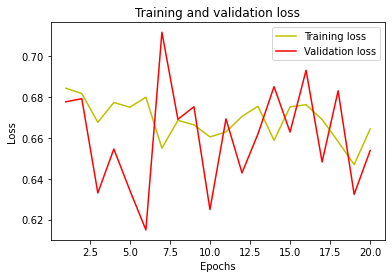

In [88]:
#plot the training and validation accuracy and loss at each epoch
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [92]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: 'acc'

In [94]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [85]:
#Now, let us use features from convolutional network for RF
X_for_RF = feature_extractor.predict(x_train) #This is out X input to RF

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [78]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [80]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [81]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [82]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

NameError: name 'prediction_RF' is not defined

In [83]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

NameError: name 'confusion_matrix' is not defined